In [7]:
import pulp

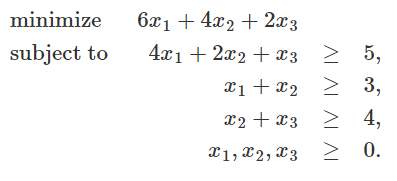

In [8]:
# 변수 정의
x1 = pulp.LpVariable('x1', lowBound=0) # 상한->upBound
x2 = pulp.LpVariable('x2', lowBound=0)
x3 = pulp.LpVariable('x3', lowBound=0)

# 문제 정의
# 최대화 문제-> pulp.LpMaximize
model = pulp.LpProblem('test_lp', pulp.LpMinimize) # 최소화 문제

In [9]:
model += 6*x1 + 4*x2 + 2*x3 # 목적 함수 정의

# 제약 조건 추가
# 부등호, 등호 있는지로 목적함수와 구분
model += x1 + x3 >= 3
model += x2 + x3 >= 4

# 목적 함수와 제약 조건에도 이름을 붙일 수 있습니다. 바로 해당 문장 끝에 쉼표를 찍고 이름을 적으면 됩니다. 예를 들어 목적 함수의 이름을 "my_obj_func"으로 정하고 싶으면 아래와 같이 하면 됩니다.
model += 4*x1 + 2*x2 + x3 >= 5, 'my_obj_func'

In [10]:
# 문제 풀기
model.solve()

1

In [11]:
# 풀었으면 최적값(optimal value)과 최적해(optimal solution)을 얻어 내야죠. 최적값을 얻는 방법은 아래와 같습니다.
pulp.value(model.objective)

9.5

In [12]:
# 최적해, 즉 최적값을 얻기 위해 x1,x2,x3이 가져야 하는 값을 얻는 방법은 다음과 같습니다.
print(x1.varValue, x2.varValue, x3.varValue)

0.25 0.0 4.0


In [13]:
# model.writeLP('out.txt')

[x1, x2, x3]

In [ ]:
# 예를 들어, LP에 필요한 변수가 x1,⋯,xn이고, 이 모든 변수들이 0보다 크거나 같아야 할 때, 이 함수를 이용해 아래와 같이 적을 수 있습니다.

# idxlist = [i + 1 for i in range(n)]
# x = pulp.LpVariable.dicts('x', idxlist, lowBound=0)

# 특정 인덱스의 변수를 호출하고 싶을 때도 파이썬의 dict와 똑같이 사용하면 됩니다. 예를 들어, x1+x3+x7≥6의 제약 조건을 만들고 싶다면 아래와 같이 쓰면 됩니다.

# x[1] + x[3] + x[7] >= 6

https://gazelle-and-cs.tistory.com/89